# Temperature Forecast Project using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Data Trained\\Evaluation Projects\\temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


## EDA

In [3]:
df.shape

(7752, 25)

In [4]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [6]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
df['lon'].value_counts()

126.970    307
127.099    307
126.955    307
127.024    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
127.040    304
126.995    304
127.004    304
126.927    303
126.991    303
126.826    302
126.937    302
126.938    302
126.988    302
126.909    302
127.086    302
127.085    301
126.838    301
127.042    301
126.910    300
127.135    296
Name: lon, dtype: int64

In [10]:
df['lat'].value_counts()

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4562     307
37.4832     307
37.6450     306
Name: lat, dtype: int64

In [11]:
df['station'].value_counts()

23.0    307
18.0    307
10.0    307
17.0    307
25.0    307
2.0     307
3.0     306
4.0     306
13.0    305
20.0    304
16.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
24.0    302
22.0    302
19.0    302
9.0     302
11.0    301
6.0     301
7.0     301
8.0     300
5.0     296
Name: station, dtype: int64

In [12]:
### Station, Latitude and Longitude refers to places, so we need to change to str format.

df['lat']=df['lat'].astype(str)
df['lon']=df['lon'].astype(str)
df['station']=df['station'].astype(str)

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

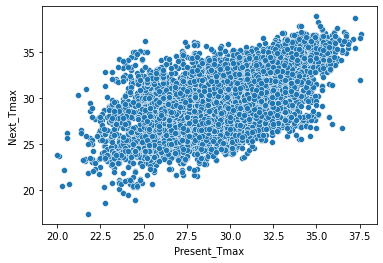

In [13]:
sns.scatterplot(df['Present_Tmax'],df['Next_Tmax'])

### If Present_Tmax is more, then Next_Tmax is also more.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmin'>

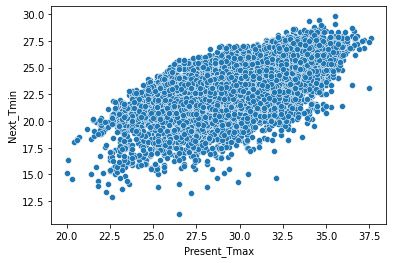

In [14]:
sns.scatterplot(df['Present_Tmax'],df['Next_Tmin'])

### If Present_Tmax is more, then Next_Tmin is also more.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmax'>

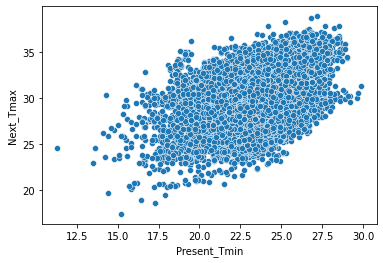

In [15]:
sns.scatterplot(df['Present_Tmin'],df['Next_Tmax'])

### If Present_Tmin is more, then Next_Tmax and Next_Tmin will also be more.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Next_Tmax'>

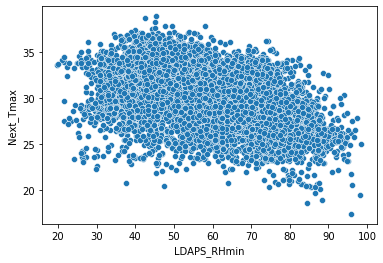

In [16]:
sns.scatterplot(df['LDAPS_RHmin'],df['Next_Tmax'])

### If LDAPS_RHmin is more, then Next_Tmax  will be slightly less.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Next_Tmax'>

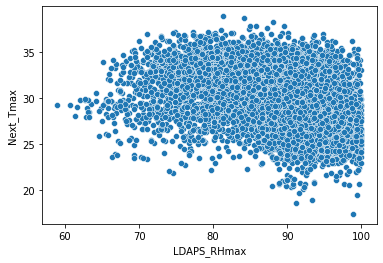

In [17]:
sns.scatterplot(df['LDAPS_RHmax'],df['Next_Tmax'])

### There is no significant relation between LDAPS_RHmax and Next_Tmax.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Next_Tmax'>

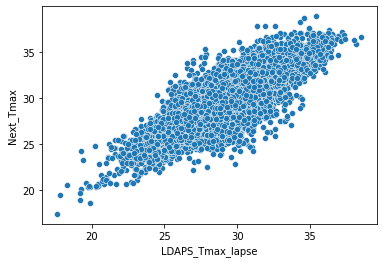

In [18]:
sns.scatterplot(df['LDAPS_Tmax_lapse'],df['Next_Tmax'])

### If LDAPS_Tmax_lapse is more, then Next_Tmax and Tmin will also be more.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmax'>

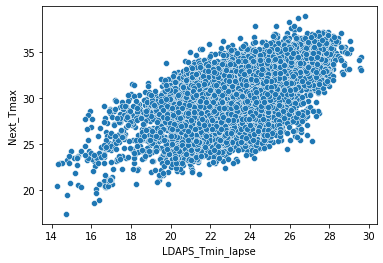

In [19]:
sns.scatterplot(df['LDAPS_Tmin_lapse'],df['Next_Tmax'])

### If LDAPS_Tmin_lapse is more, then Next_Tmax and Tmin will also be more.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Next_Tmax'>

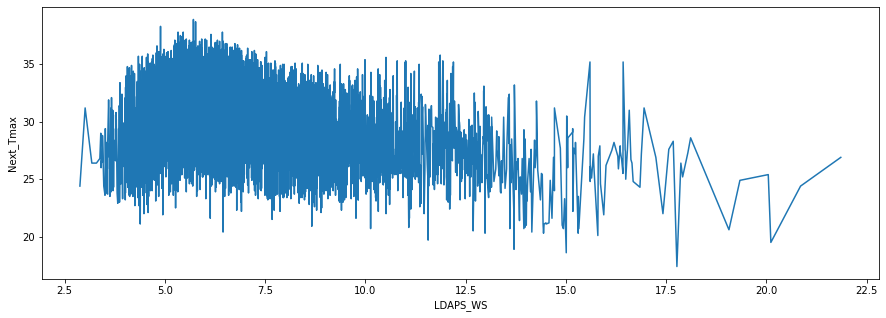

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(df['LDAPS_WS'],df['Next_Tmax'])

### There is no relation between Wind speed and next day temperature.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Next_Tmax'>

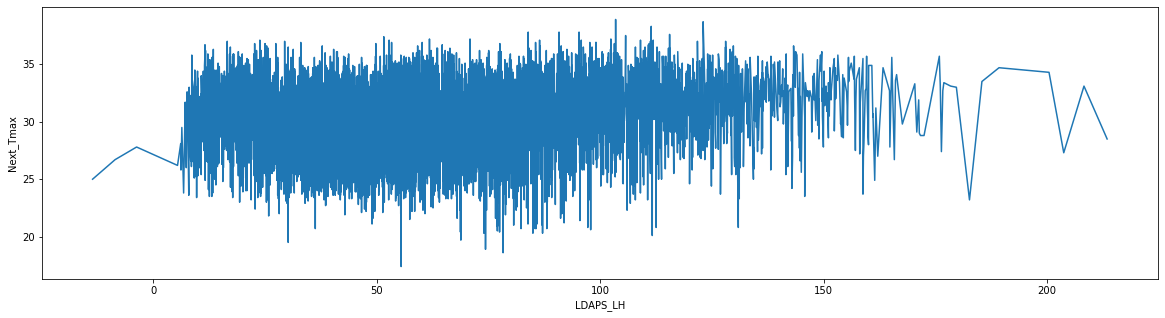

In [21]:
plt.figure(figsize=(20,5))
sns.lineplot(df['LDAPS_LH'],df['Next_Tmax'])

### There is no relation between Latent Heat flux and next day temperature.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

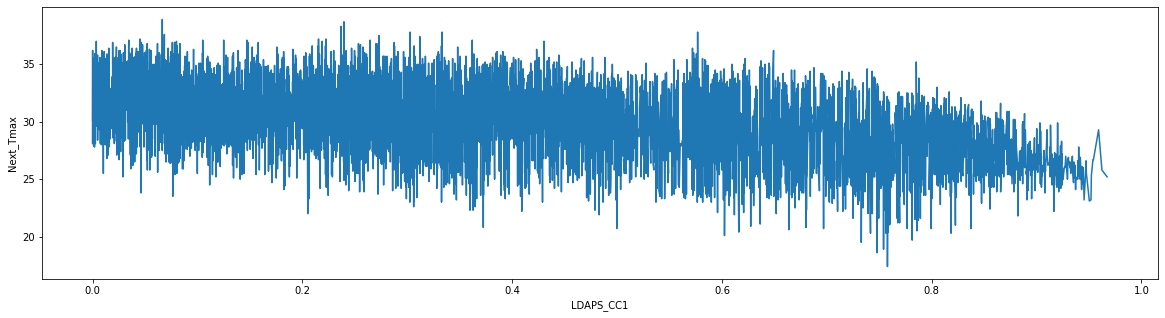

In [22]:
plt.figure(figsize=(20,5))
sns.lineplot(df['LDAPS_CC1'],df['Next_Tmax'])

### There is no significant relation between 1st 6hour cloud cover and next day temperature.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

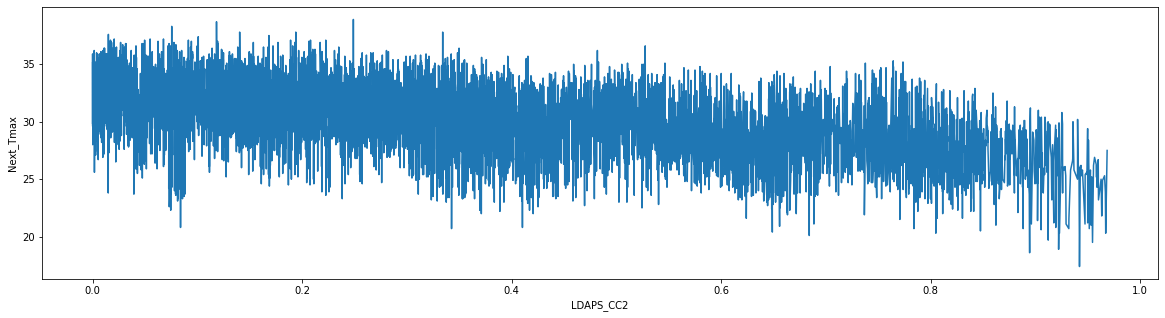

In [23]:
plt.figure(figsize=(20,5))
sns.lineplot(df['LDAPS_CC2'],df['Next_Tmax'])

### There is no significant relation between 2nd 6hour cloud cover and next day temperature.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

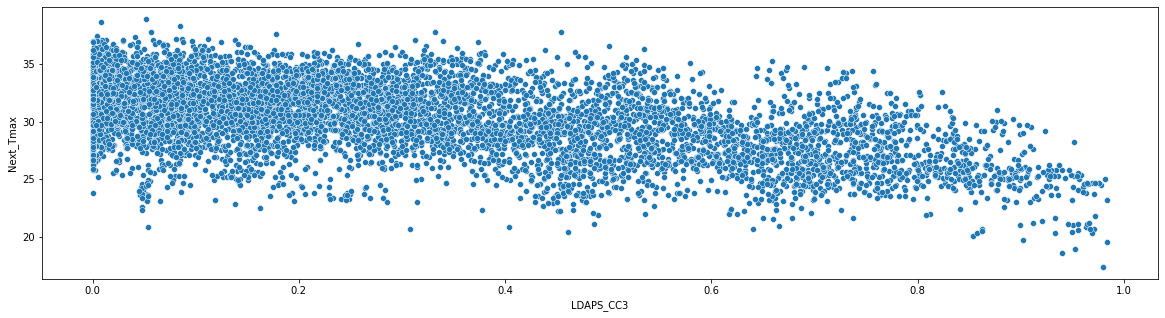

In [24]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['LDAPS_CC3'],df['Next_Tmax'])

### There is no significant relation between 3rd 6hour cloud cover and next day temperature.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

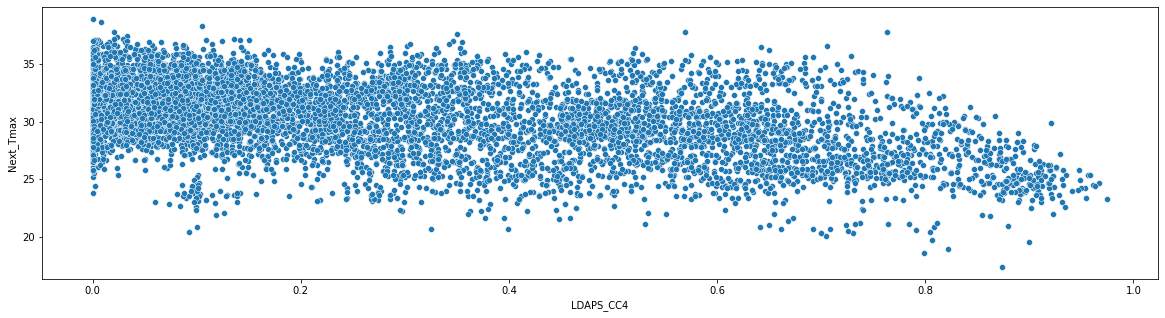

In [25]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['LDAPS_CC4'],df['Next_Tmax'])

### There is no significant relation between 4th 6hour cloud cover and next day temperature.

In [26]:
d=['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']

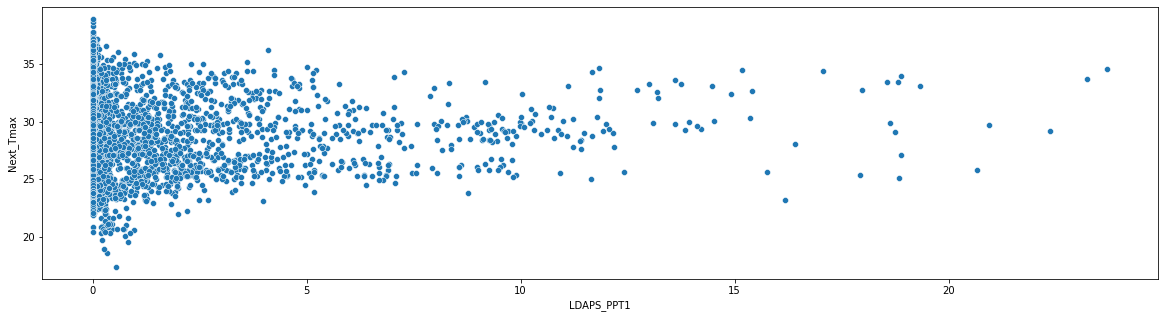

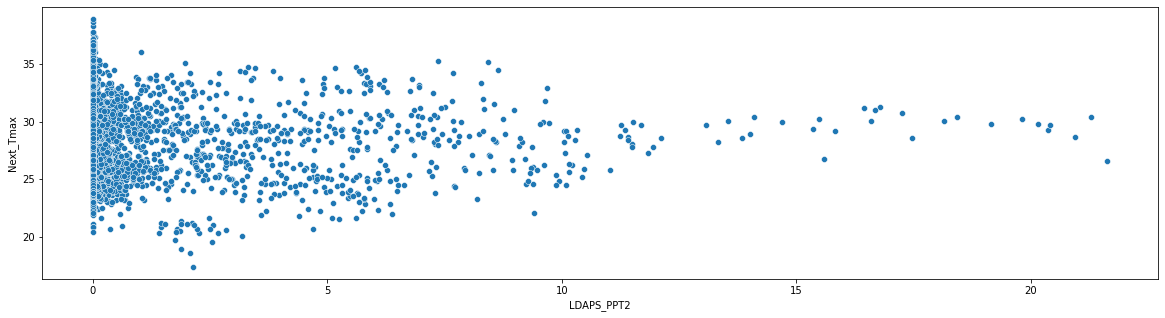

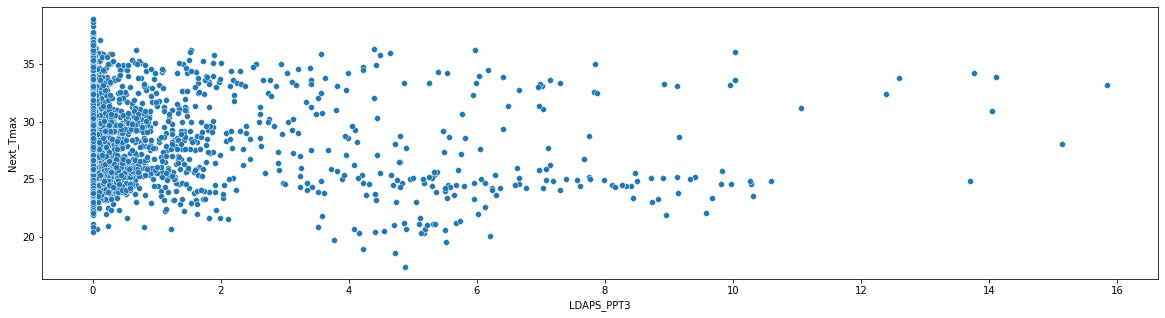

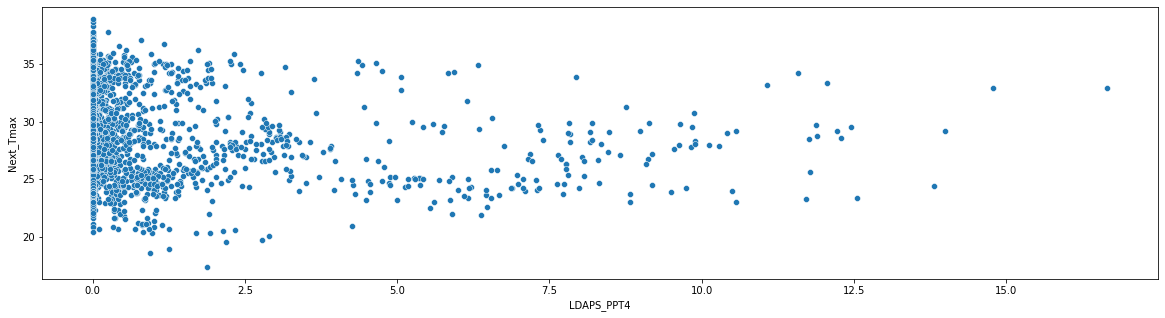

In [27]:
for i in d:
    plt.figure(figsize=(20,5))
    sns.scatterplot(df[i],df['Next_Tmax'])

### There is no significant relation between Precipitation and next day temperature.

<AxesSubplot:xlabel='lat', ylabel='Next_Tmax'>

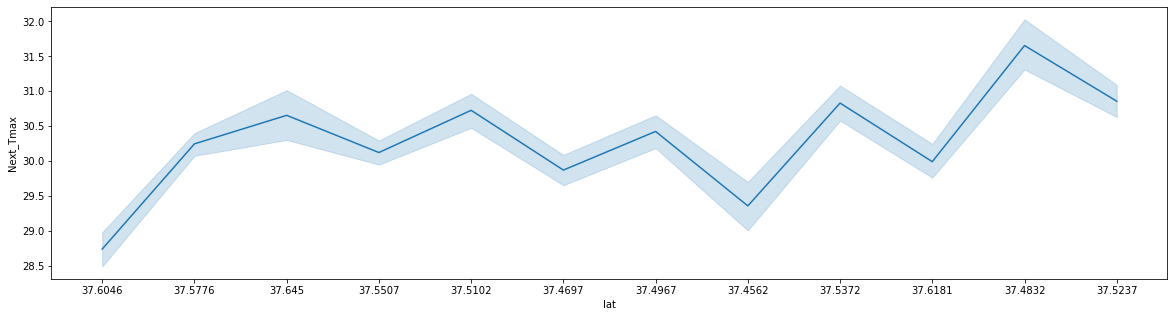

In [28]:
plt.figure(figsize=(20,5))
sns.lineplot(df['lat'],df['Next_Tmax'])

### The Area with latitude between 37.4832 will have high temperature.

<AxesSubplot:xlabel='lon', ylabel='Next_Tmax'>

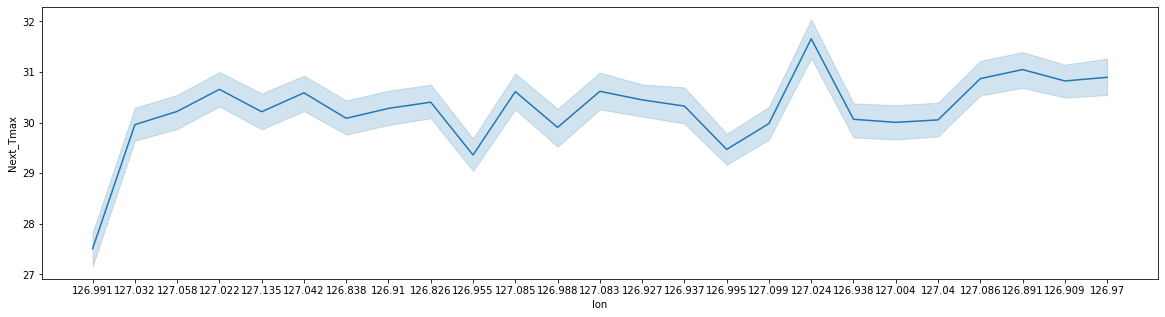

In [29]:
plt.figure(figsize=(20,5))
sns.lineplot(df['lon'],df['Next_Tmax'])

### The area with longitude nearly 126.991 will have least temperature.

<AxesSubplot:xlabel='DEM', ylabel='Next_Tmax'>

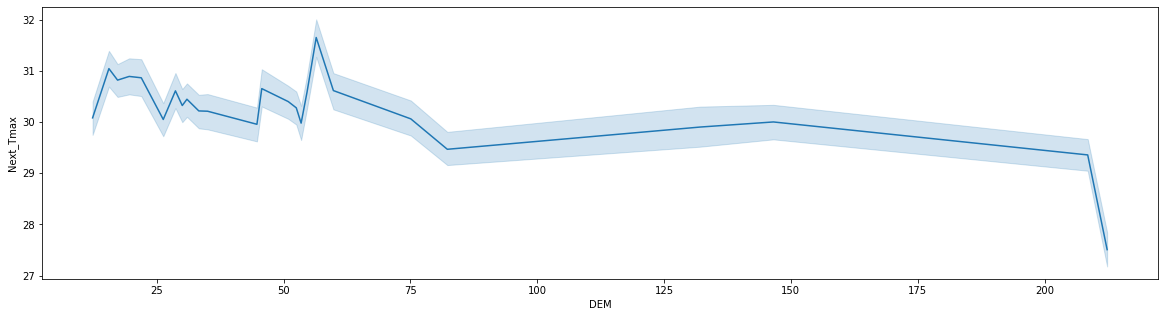

In [30]:
plt.figure(figsize=(20,5))
sns.lineplot(df['DEM'],df['Next_Tmax'])

### The places with lower elevation will have a slightly high temperature.

<AxesSubplot:xlabel='Slope', ylabel='Next_Tmax'>

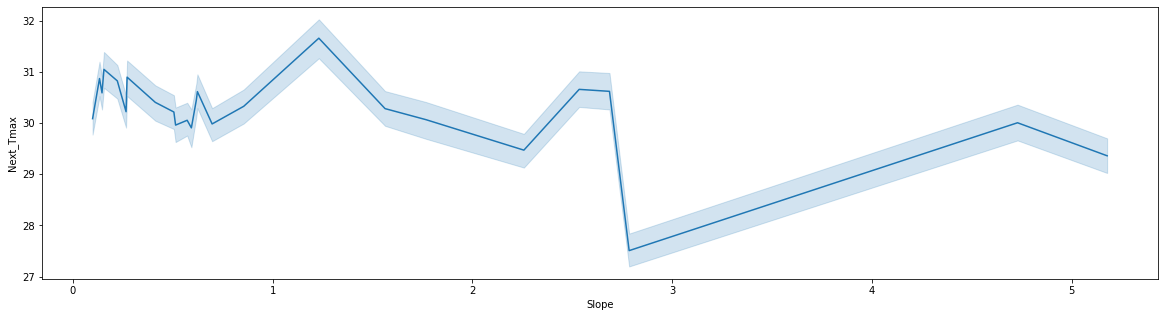

In [31]:
plt.figure(figsize=(20,5))
sns.lineplot(df['Slope'],df['Next_Tmax'])

### The places with slope 2.7 and 2.8 has least temperature.

<AxesSubplot:xlabel='Solar radiation', ylabel='Next_Tmax'>

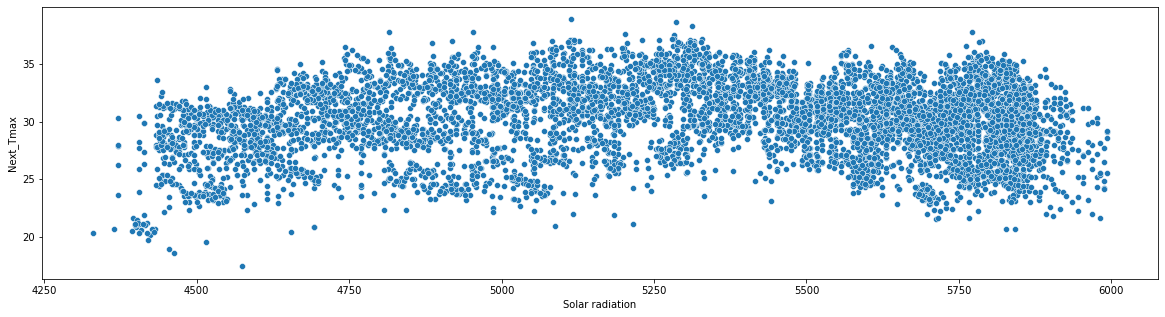

In [32]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Solar radiation'],df['Next_Tmax'])

### There is no significant relation between Solar Radiation and Temperature.

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

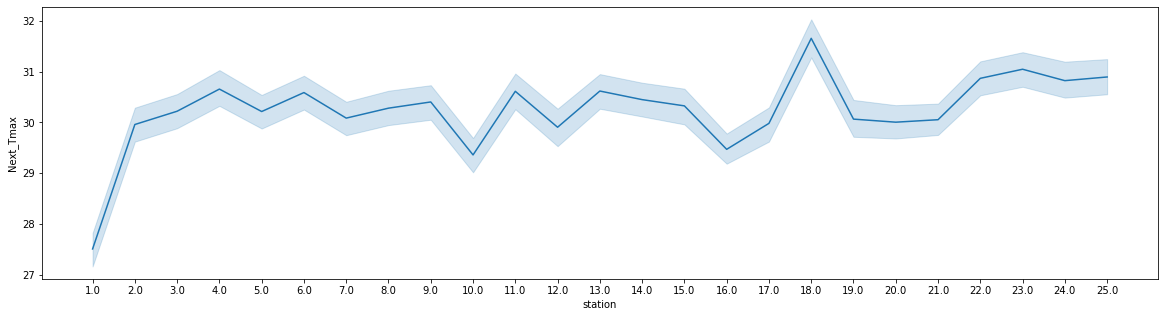

In [33]:
plt.figure(figsize=(20,5))
sns.lineplot(df['station'],df['Next_Tmax'])

### Temperature Recorded at Station 1 is least among all other stations.

In [34]:
### Dividing Date into day,month and year columns.

df['Day']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[1]
df['Year']=df['Date'].str.split('-').str[2]

In [35]:
df.drop(['Date'],axis=1,inplace=True)

In [36]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.645,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


In [37]:
df['Year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Next_Tmax'>

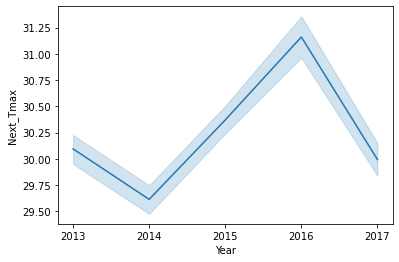

In [38]:
sns.lineplot(df['Year'],df['Next_Tmax'])

### Temperature is recorded more in the year 2016.

<AxesSubplot:xlabel='Month', ylabel='Next_Tmax'>

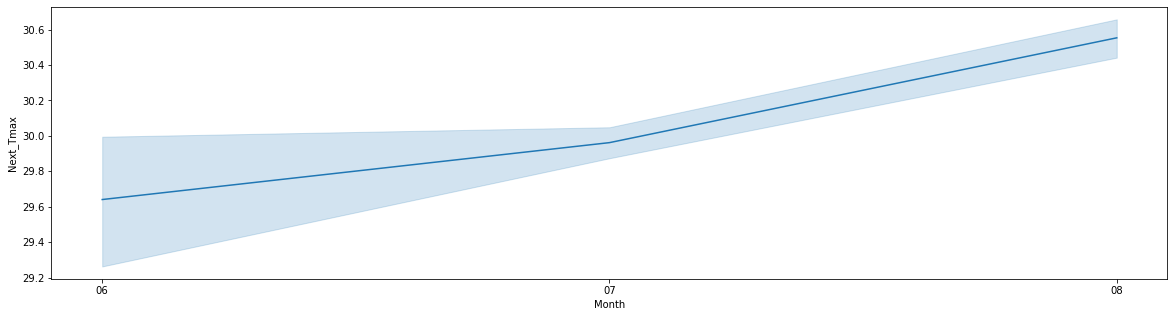

In [39]:
plt.figure(figsize=(20,5))
sns.lineplot(df['Month'],df['Next_Tmax'])

### Temperature will be more in the month of August.

In [40]:
t=list(df.columns)
t.remove('Day')
t.remove('Month')
t.remove('Year')
t.remove('station')
t.remove('lat')
t.remove('lon')

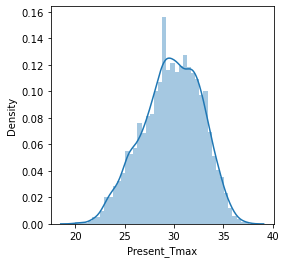

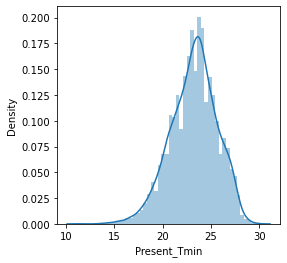

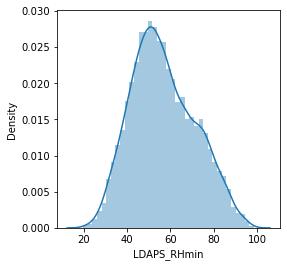

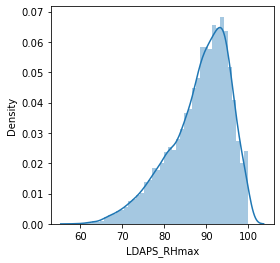

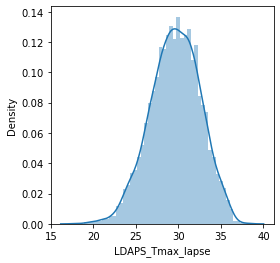

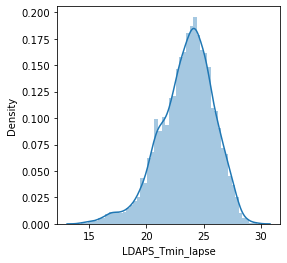

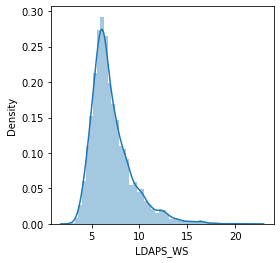

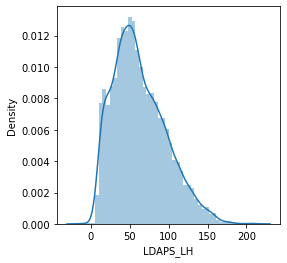

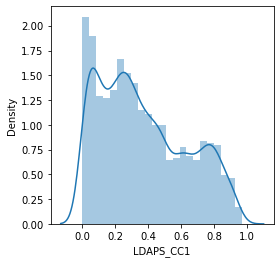

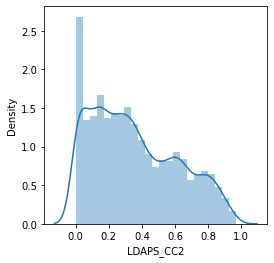

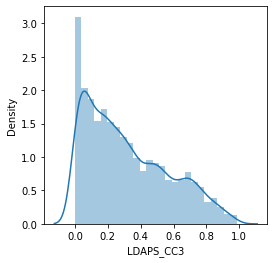

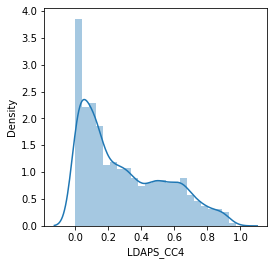

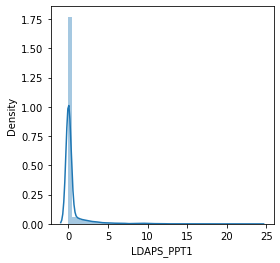

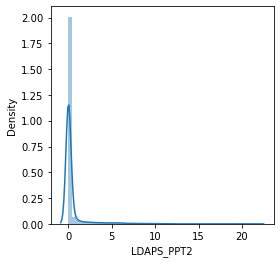

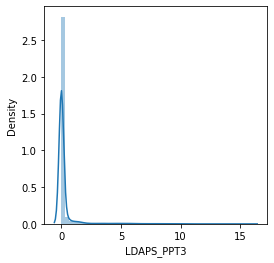

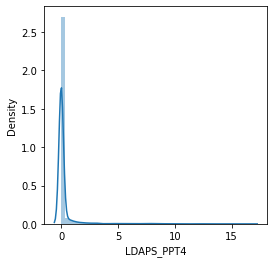

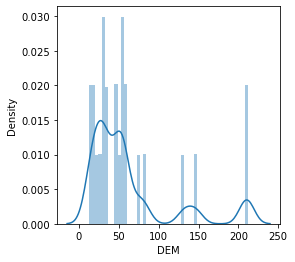

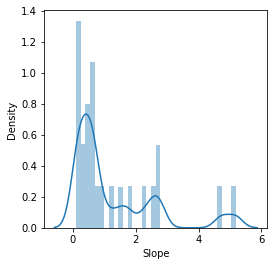

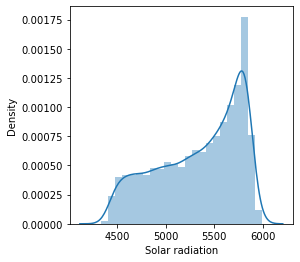

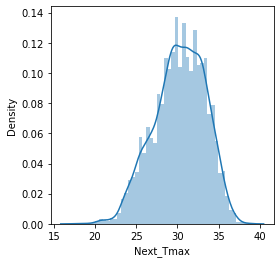

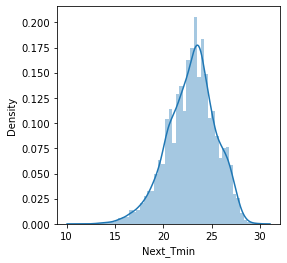

In [41]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.distplot(df[i])

### LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, DEM, Slope and Solar Radiation are not normally distributed. There is skewness present in the data.

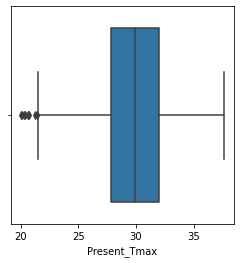

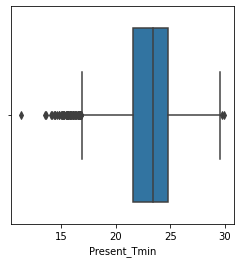

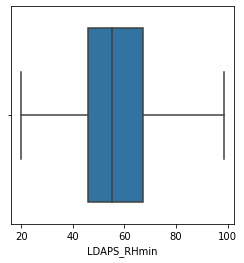

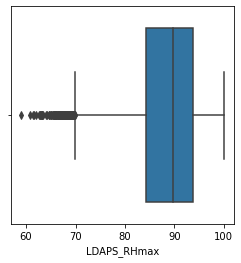

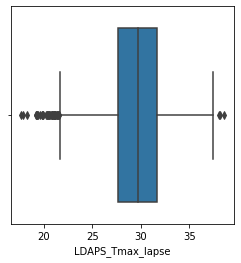

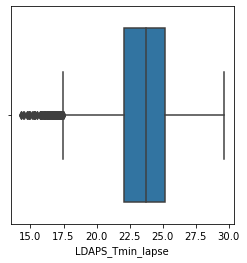

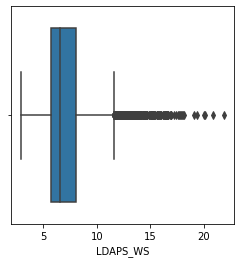

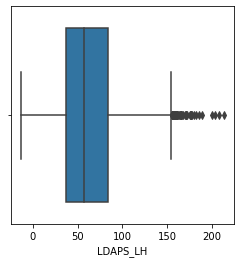

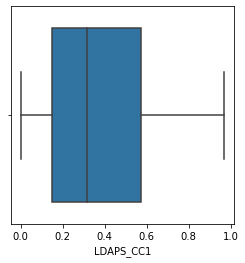

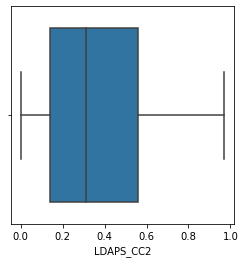

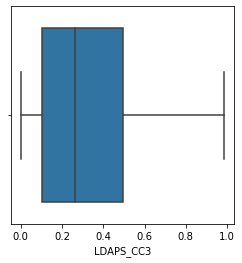

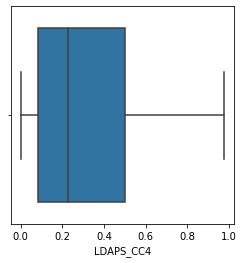

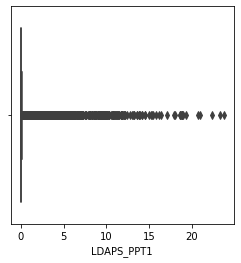

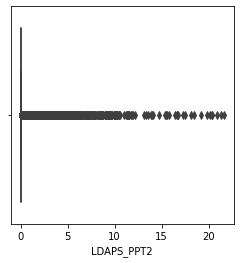

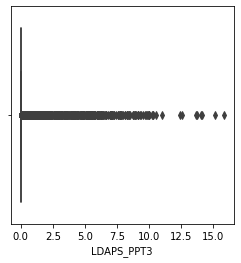

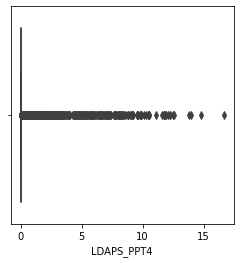

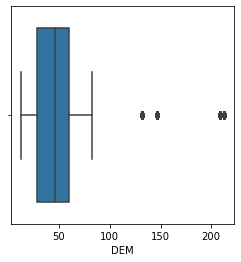

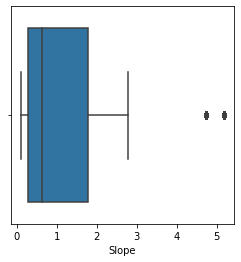

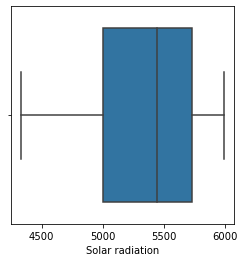

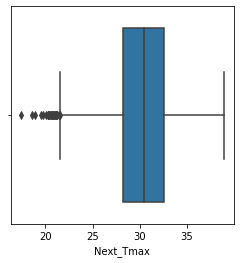

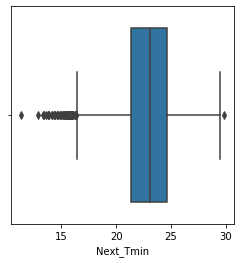

In [42]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### There are many outliers presen in the data.

## Removing Outliers

In [43]:
for i in t:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    outliers = df[(df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR)]
    
    fare_mean = df[i].mean()
    fare_std = df[i].std()
    low= fare_mean -(3 * fare_std)
    high= fare_mean + (3 * fare_std)
    fare_outliers = df[(df[i] < low) | (df[i] > high)]
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    df[i]=np.where(df[i]>upper_whisker,upper_whisker,np.where(df[i]<lower_whisker,lower_whisker,df[i]))

### Instead of eliminating the outliers, we have replaced the outliers higher than the upper whisker by the value of upper whisker and the outliers lower than the lower whisker by the value of lower whisker.

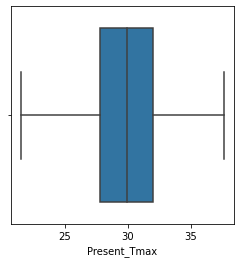

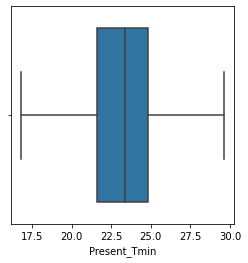

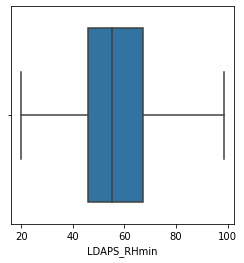

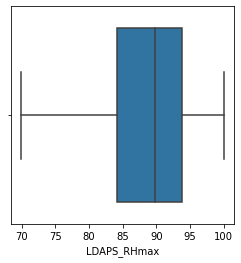

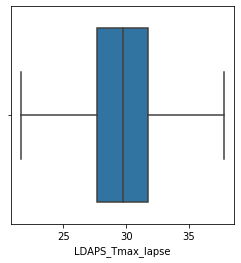

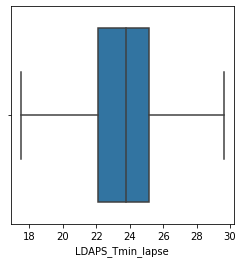

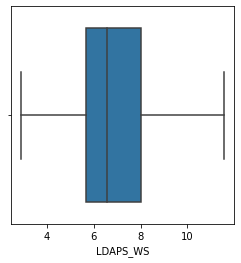

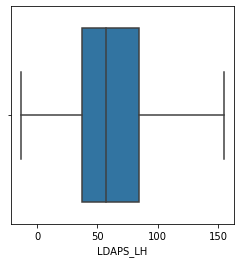

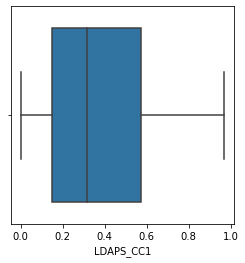

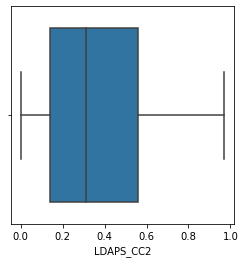

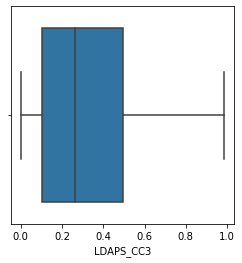

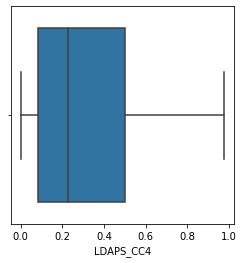

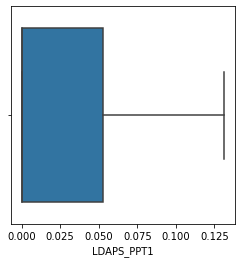

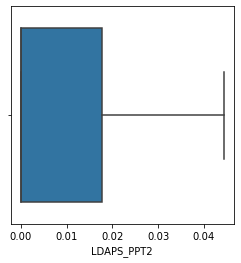

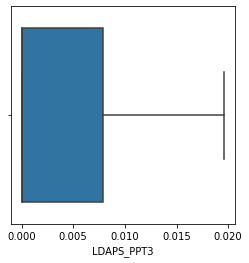

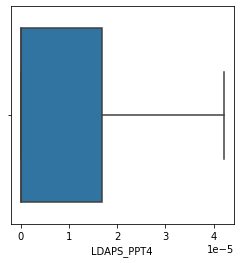

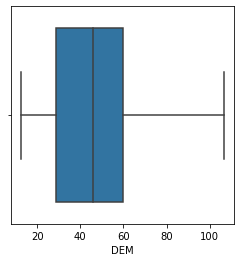

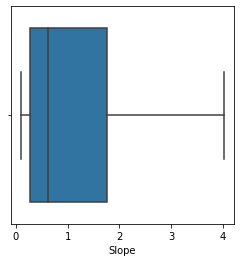

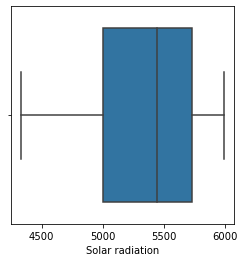

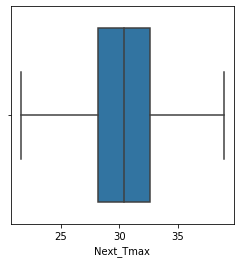

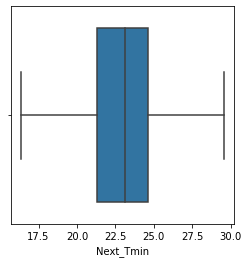

In [44]:
for i in t:
    plt.figure(figsize=(4,4))
    sns.boxplot(df[i])

### Outliers have been removed.

## Skewness

In [45]:
df.skew()

station            -0.004178
Present_Tmax       -0.249234
Present_Tmin       -0.263286
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.738805
LDAPS_Tmax_lapse   -0.168458
LDAPS_Tmin_lapse   -0.421872
LDAPS_WS            0.826343
LDAPS_LH            0.598643
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.168398
LDAPS_PPT2          1.168897
LDAPS_PPT3          1.178753
LDAPS_PPT4          1.155677
lat                 0.085377
lon                -0.289048
DEM                 0.728472
Slope               1.177536
Solar radiation    -0.524325
Next_Tmax          -0.300677
Next_Tmin          -0.299612
Day                -0.010718
Month              -0.174856
Year                0.013575
dtype: float64

In [46]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
f=['LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope']
for i in f:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))[:,0]

### Skewness is removed from data.

## Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
v=['station','lat','lon','Day','Month','Year']
lab=LabelEncoder()
for i in v:
    df[i]=lab.fit_transform(df[i].values.reshape(-1,1))

In [48]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,0.082024,0.320172,0.233947,...,9,11,1.540360,1.352422,5992.895996,29.1,21.2,29,0,0
1,11,31.9,21.6,52.263397,90.604721,29.850689,24.035009,-0.644047,-0.202605,0.225508,...,9,16,0.042621,-0.392017,5869.312500,30.5,22.5,29,0,0
2,18,31.6,23.3,48.690479,83.973587,30.091292,24.565633,-0.334567,-1.383482,0.209344,...,8,19,-0.430782,-0.954424,5863.555664,31.1,23.9,29,0,0
3,19,32.0,23.4,58.239788,96.483688,29.704629,23.326177,-0.674755,0.214116,0.216372,...,11,14,0.077102,1.269034,5856.964844,31.7,24.3,29,0,0
4,20,31.4,21.9,56.174095,90.155128,29.113934,23.486480,-0.612724,1.302823,0.151407,...,7,24,-0.350980,-0.408457,5859.552246,31.2,22.5,29,0,0


<AxesSubplot:>

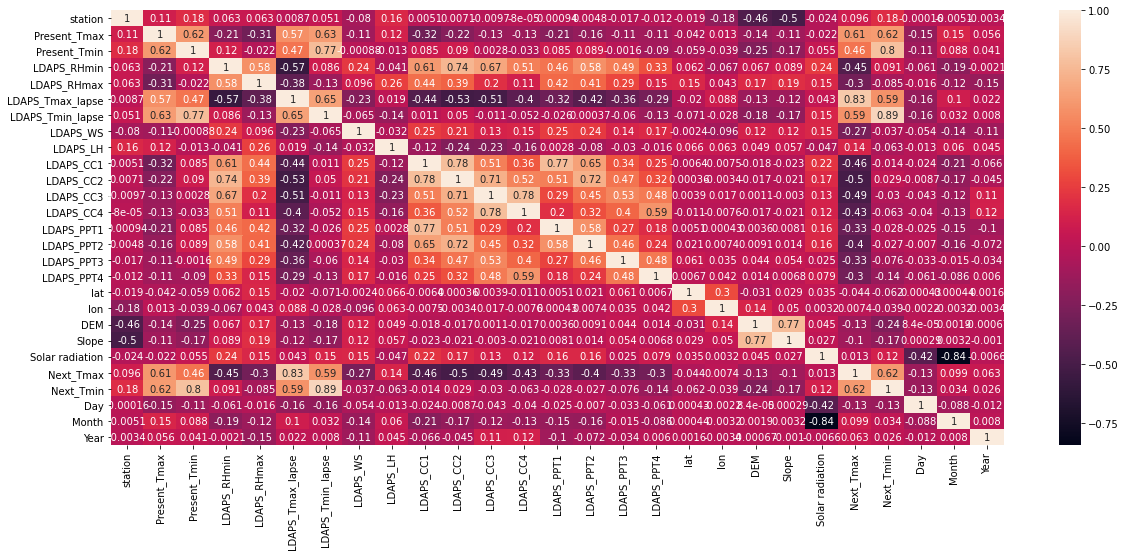

In [49]:
cor=df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True)

In [50]:
df.drop(['lat','lon','Solar radiation','Month','Year'],axis=1,inplace=True)

### These columns are having very less relation with the target column.

In [51]:
x=df.drop(['Next_Tmax'],axis=1)
y1=df['Next_Tmax']

## Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmin,Day
0,-1.664210,-0.354074,-0.761030,0.104660,0.383550,-0.531417,-0.228738,0.082024,0.320172,-0.513123,...,-0.533720,-0.577558,-0.658137,-0.638626,-0.630228,-0.577532,1.540360,1.352422,-0.702607,1.578778
1,-0.136453,0.725564,-0.676707,-0.305052,0.311065,0.076635,0.220631,-0.644047,-0.202605,-0.545304,...,-0.546143,-0.596343,-0.658137,-0.638626,-0.630228,-0.577532,0.042621,-0.392017,-0.171973,1.578778
2,0.835756,0.624348,0.040039,-0.549344,-0.628377,0.158983,0.452566,-0.334567,-1.383482,-0.606944,...,-0.309696,-0.512901,-0.658137,-0.638626,-0.630228,-0.577532,-0.430782,-0.954424,0.399479,1.578778
3,0.974643,0.759303,0.082200,0.103573,1.143947,0.026644,-0.089198,-0.674755,0.214116,-0.580143,...,-0.536690,-0.558214,-0.658137,-0.638626,-0.630228,-0.577532,0.077102,1.269034,0.562751,1.578778
4,1.113530,0.556870,-0.550222,-0.037665,0.247371,-0.175526,-0.019130,-0.612724,1.302823,-0.827872,...,-0.440658,-0.358647,-0.658137,-0.638626,-0.630228,-0.577532,-0.350980,-0.408457,-0.171973,1.578778


## i.) For predicting Next_Tmax.

## Choosing Random Variable

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.8111301501368933 ran state= 30


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

## Lasso Regression

In [56]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'random_state': 3, 'selection': 'random'}


In [57]:
ls = Lasso(alpha=0.001,fit_intercept=True,random_state=3,selection='random')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

81.12141861007139

In [58]:
from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.3593259276844825


## Ridge Regression

In [59]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'copy_X': True, 'max_iter': 1, 'normalize': False}


In [60]:
rd = Ridge(alpha=1,copy_X=True,max_iter=1,normalize=False)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

81.11314396142654

In [61]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.3596237973168674


## Linear Regression

In [67]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [68]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

81.11301501368932

In [69]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.3596284386428918


## Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(1,15)),
            'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}


In [66]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,max_features='auto',splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

81.85478148132866

In [70]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.3596284386428918


## Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y1,cv=5).mean())*100
cv2=(cross_val_score(rd,x,y1,cv=5).mean())*100
cv3=(cross_val_score(lr,x,y1,cv=5).mean())*100
cv4=(cross_val_score(dtr,x,y1,cv=5).mean())*100
print(cv1,cv2,cv3,cv4)

72.51269912430169 72.47464557604522 72.47230297691765 54.790654844348666


In [72]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

8.608719485769697 8.638498385381325 8.640712036771674 27.064126636979992


### We can choose Lasso Regressor as our model, since its r2 score and cv_score has least difference.

In [73]:
fin_Tmax = Lasso(alpha=0.001,fit_intercept=True,random_state=3,selection='random')
fin_Tmax.fit(x_train,y_train)
pred=fin_Tmax.predict(x_test)
r2=r2_score(y_test,pred)
fin_r2=r2*100
fin_r2

81.12141861007139

## ii.) Predicting Next_Tmin

In [74]:
x=df.drop(['Next_Tmin'],axis=1)
y2=df['Next_Tmin']

## Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Day
0,-1.664210,-0.354074,-0.761030,0.104660,0.383550,-0.531417,-0.228738,0.082024,0.320172,-0.513123,...,-0.533720,-0.577558,-0.658137,-0.638626,-0.630228,-0.577532,1.540360,1.352422,-0.370090,1.578778
1,-0.136453,0.725564,-0.676707,-0.305052,0.311065,0.076635,0.220631,-0.644047,-0.202605,-0.545304,...,-0.546143,-0.596343,-0.658137,-0.638626,-0.630228,-0.577532,0.042621,-0.392017,0.081936,1.578778
2,0.835756,0.624348,0.040039,-0.549344,-0.628377,0.158983,0.452566,-0.334567,-1.383482,-0.606944,...,-0.309696,-0.512901,-0.658137,-0.638626,-0.630228,-0.577532,-0.430782,-0.954424,0.275661,1.578778
3,0.974643,0.759303,0.082200,0.103573,1.143947,0.026644,-0.089198,-0.674755,0.214116,-0.580143,...,-0.536690,-0.558214,-0.658137,-0.638626,-0.630228,-0.577532,0.077102,1.269034,0.469387,1.578778
4,1.113530,0.556870,-0.550222,-0.037665,0.247371,-0.175526,-0.019130,-0.612724,1.302823,-0.827872,...,-0.440658,-0.358647,-0.658137,-0.638626,-0.630228,-0.577532,-0.350980,-0.408457,0.307949,1.578778


## Choosing Random Variable

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxr2=0
maxran=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y2,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxran=i
print('max r2=',maxr2,'ran state=',maxran)

max r2= 0.8735060368746852 ran state= 103


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.2,random_state=maxran)

## Model Selection with Hyper Parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

## Lasso Regression

In [79]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10)),'fit_intercept':[True,False],'selection':['cyclic', 'random']}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'random_state': 0, 'selection': 'cyclic'}


In [80]:
ls = Lasso(alpha=0.0001,fit_intercept=True,random_state=0,selection='cyclic')
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
r2=r2_score(y_test,pred)
a1=r2*100
a1

99.999999435163

In [81]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.00023456119650782075


## Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'max_iter':list(range(1,11)),'normalize':[True,False],'copy_X':[True,False]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'copy_X': True, 'max_iter': 1, 'normalize': False}


In [83]:
rd = Ridge(alpha=0.0001,copy_X=True,max_iter=1,normalize=False)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
r2=r2_score(y_test,pred)
a2=r2*100
a2

99.99999999999989

In [84]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 1.046966620773712e-07


## Linear Regression

In [85]:
parameters = {'fit_intercept':[True,False], 'copy_X':[True,False],'normalize':[True,False],'n_jobs':list(range(1,11))}
lr=LinearRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [86]:
lr=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
a3=r2*100
a3

100.0

In [87]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 5.7879258149961986e-15


## Decision Tree Regression

In [88]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best', 'random'],'max_depth':list(range(10,20)),
            'max_features':['auto', 'sqrt', 'log2']}
dtr=DecisionTreeRegressor()
clf = GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 19, 'max_features': 'auto', 'splitter': 'best'}


In [89]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=19,max_features='auto',splitter='best')
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
a4=r2*100
a4

99.99878266100876

In [90]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

RMSE: 0.010889310129609376


## Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score
cv1=(cross_val_score(ls,x,y1,cv=5).mean())*100
cv2=(cross_val_score(rd,x,y1,cv=5).mean())*100
cv3=(cross_val_score(lr,x,y1,cv=5).mean())*100
cv4=(cross_val_score(dtr,x,y1,cv=5).mean())*100
print(cv1,cv2,cv3,cv4)

99.99999818289693 99.99999999999984 100.0 99.99019235067179


In [92]:
print((a1-cv1),(a2-cv2),(a3-cv3),(a4-cv4))

1.2522660739477942e-06 4.263256414560601e-14 0.0 0.00859031033697022


### We can choose Linear Regressor as our model, since its r2 score and cv_score has no difference.

In [93]:
fin_Tmin = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True)
fin_Tmin.fit(x_train,y_train)
pred=fin_Tmin.predict(x_test)
r2=r2_score(y_test,pred)
fin_r2=r2*100
fin_r2

100.0

## Saving the Model

In [94]:
import joblib
joblib.dump(fin_Tmax,'Final_Tmax.pkl')
joblib.dump(fin_Tmin,'Final_Tmin.pkl')

['Final_Tmin.pkl']